In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import from RKPy src
import sys
sys.path.append("../src")
from explicit_solvers import Dormand_Prince_7_4_5
from ivp import IVP

In [3]:
# Plotting function
def plot_attractor(y):
    fig = plt.figure(figsize=(8,8))
    ax = plt.axes(projection='3d')
    ax.grid(True, c="lightgrey")
    ax.plot3D(y[:,0], y[:,1], y[:,2], color="blueviolet", lw=1)
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    ax.set_zlabel("z", fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='z', labelsize=14)
    plt.show()

#### Lorenz Attractor

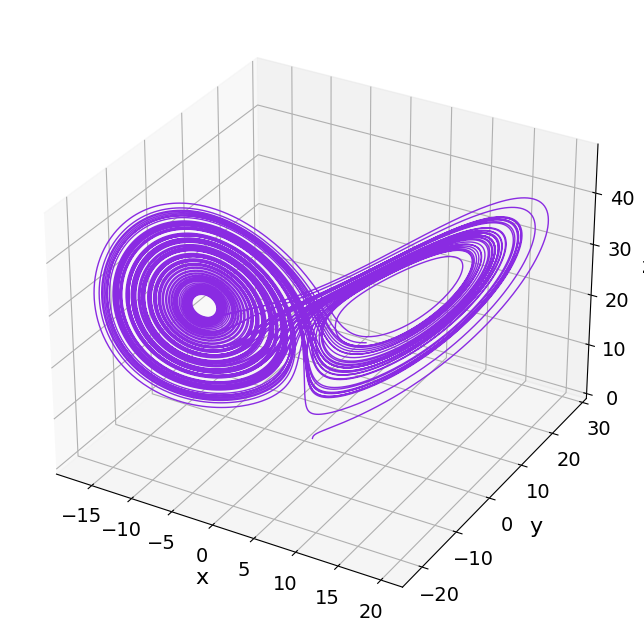

In [4]:
# Right-hand side of Lorenz system
def lorenz(t, yvec, sigma, rho, beta):
    x, y, z = yvec[0], yvec[1], yvec[2]
    dx = sigma*(y - x)
    dy = x*(rho - z) - y
    dz = x*y - beta*z
    return np.array([dx, dy, dz])

# Define parameters for IVP
t0 = 0.0
tf = 100.0
dt = 0.01
y0 = np.array([1.0, 0.0, 0.0])
rho = 28.0
sigma = 10.0
beta = 8.0/3.0

# Define and solve IVP
ivp = IVP(lorenz, y0=y0, t=(t0, tf), dt=dt, solver=Dormand_Prince_7_4_5, args=(sigma, rho, beta))
t, y = ivp.solve()

# Plot results
plot_attractor(y)

#### Modified Lorenz Attractor

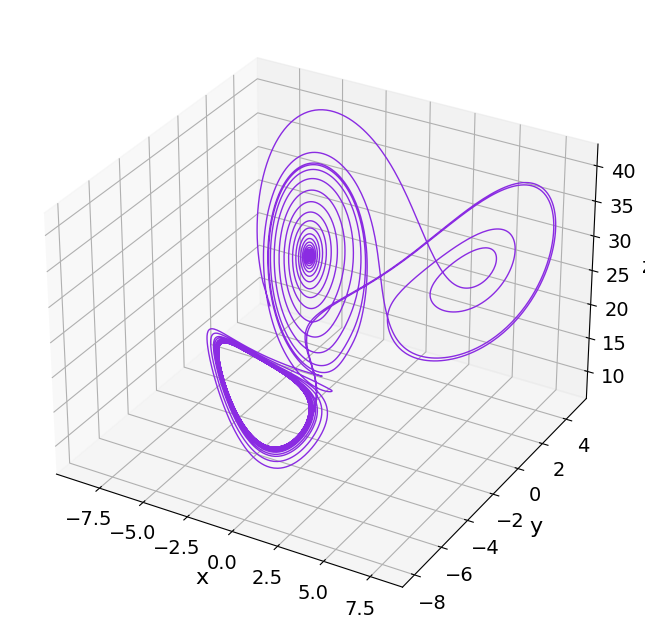

In [5]:
# Right-hand side of modified Lorenz system
def modified_lorenz(t, yvec, a, b, c):
    x, y, z = yvec[0], yvec[1], yvec[2]
    dx = (1.0/3.0)*(-(1.0 + a)*x + a - c + y*z) + ((1.0 - a)*(x**2 - y**2) + (2.0*(a + c - z))*x*y)*(1.0/(3.0*np.sqrt(x**2 + y**2)))
    dy = (1.0/3.0)*((c - a - z)*x - (a + 1)*y) + (2.0*(a - 1)*x*y + (a + c - z)*(x**2 - y**2))*(1.0/(3.0*np.sqrt(x**2 + y**2)))
    dz = 0.5*(3.0*(x**2)*y - y**3) - b*z
    return np.array([dx, dy, dz])

# Define parameters for IVP
t0 = 0.0
tf = 500.0
dt = 0.01
y0 = np.array([-8.0, 4.0, 10.0])
a = 10.0
b = 8.0/3.0
c = 137.0/5.0

# Define and solve IVP
ivp = IVP(modified_lorenz, y0=y0, t=(t0, tf), dt=dt, solver=Dormand_Prince_7_4_5, args=(a, b, c))
t, y = ivp.solve()

# Plot results
plot_attractor(y)

#### Chua 3-Scroll Attractor

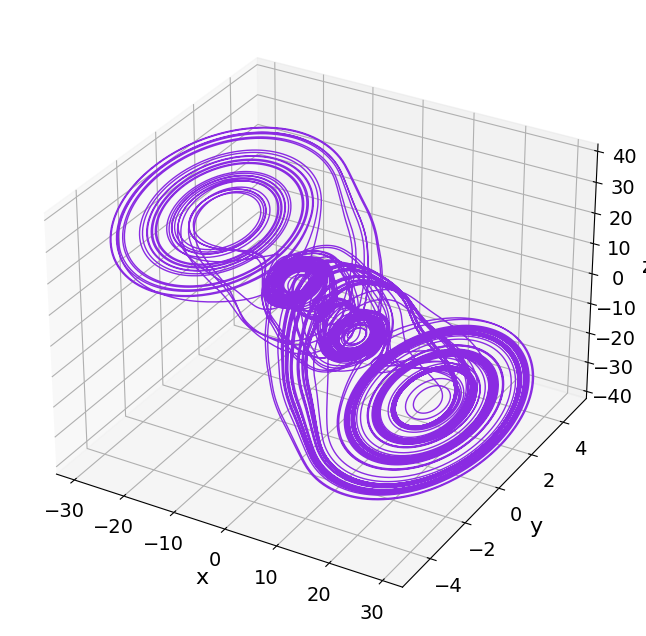

In [6]:
# Right-hand side of Chua 3-scroll system
def chua_3scroll(t, yvec, alpha, beta, m, c):
    x, y, z = yvec[0], yvec[1], yvec[2]

    hsum = 0.0
    for i in range(len(m) - 1):
        hsum += (m[i] - m[i+1])*(np.abs(x + c[i]) - np.abs(x - c[i]))
    
    h = m[-1]*x + 0.5*hsum
    dx = alpha*(y - h)
    dy = x - y + z 
    dz = -beta*y
    return np.array([dx, dy, dz])

# Define parameters for IVP
t0 = 0.0
tf = 500.0
dt = 0.01
y0 = np.array([1.0, 1.0, 0.0])
alpha = 9.0
beta = 14.286
m = np.array([-1.0/7.0, 2.0/7.0, -4.0/7.0, 2.0/7.0, -4.0/7.0, 2.0/7.0])
c = np.array([1.0, 2.15, 3.6, 8.2, 13.0])

# Define and solve IVP
ivp = IVP(chua_3scroll, y0=y0, t=(t0, tf), dt=dt, solver=Dormand_Prince_7_4_5, args=(alpha, beta, m, c))
t, y = ivp.solve()

# Plot results
plot_attractor(y)

#### Aizawa Attractor

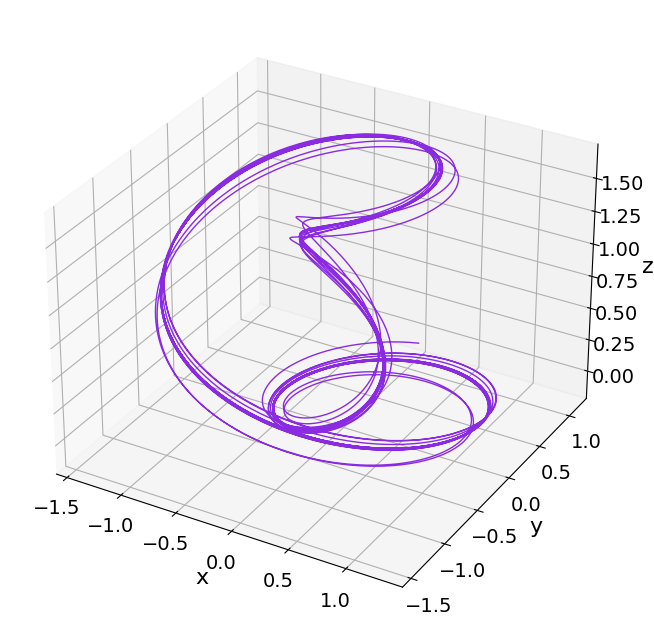

In [7]:
# Right-hand side of Aizawa system
def aizawa(t, yvec, a, b, c, d, e, f):
    x, y, z = yvec[0], yvec[1], yvec[2]
    dx = (z - b)*x - d*y 
    dy = d*x + (z - b)*y 
    dz = c + a*z - (z**3)/3.0 - (x**2 + y**2)*(1.0 + e*z) + f*z*x**3
    return np.array([dx, dy, dz])

# Define parameters for IVP
t0 = 0.0
tf = 1000.0
dt = 0.01
y0 = np.array([0.1, 1, 0.01])
a = 0.95
b = 0.7
c = 0.6
d = 3.5
e = 0.25
f = 0.1

# Define and solve IVP
ivp = IVP(aizawa, y0=y0, t=(t0, tf), dt=dt, solver=Dormand_Prince_7_4_5, args=(a, b, c, d, e, f))
t, y = ivp.solve()

# Plot results
plot_attractor(y)